In [71]:
from pathlib import Path
import os
from mlebe.masking.predict_mask import predict_mask
from mlebe.training.dataio.loaders.utils import make_dataselection_anat, make_dataselection_func
from numpy import random
import nibabel as nib
from matplotlib import pyplot as plt
from mlebe.training.configs.utils import json_to_dict, write_to_jsonfile
import pandas as pd

In [52]:
input_type = 'anat'
studies = ["drlfom", "mgtdbs", "opfvta", "ztau", "hendrik_nvcz", "irsabi"]
data_dir = Path('/mnt/data/hendrik/mlebe_data/')
template_path = Path('/usr/share/mouse-brain-atlases/dsurqec_200micron.nii')
func_training_dir = Path('~/var/tmp/func_training').expanduser()
if input_type == 'anat':
    data_selection, blacklist_selection = make_dataselection_anat(Path(data_dir), studies)
else:
    data_selection = make_dataselection_func(Path(data_dir), studies, func_training_dir)

opfvta
hendrik_nvcz
ztau
irsabi
drlfom
mgtdbs


In [53]:
data_selection.head()

,data_set,subject,session,acquisition,type,uid,path
0,opfvta,6639,ofM,TurboRARE,T2w,sub-6639_ses-ofM_acq-TurboRARE_T2w,/mnt/data/hendrik/mlebe_data/opfvta/preprocess...
1,opfvta,5685,ofMr1,TurboRARE,T2w,sub-5685_ses-ofMr1_acq-TurboRARE_T2w,/mnt/data/hendrik/mlebe_data/opfvta/preprocess...
2,opfvta,5685,ofM,TurboRARE,T2w,sub-5685_ses-ofM_acq-TurboRARE_T2w,/mnt/data/hendrik/mlebe_data/opfvta/preprocess...
3,opfvta,6468,ofM,TurboRARE,T2w,sub-6468_ses-ofM_acq-TurboRARE_T2w,/mnt/data/hendrik/mlebe_data/opfvta/preprocess...
4,opfvta,6592,ofMr1,TurboRARE,T2w,sub-6592_ses-ofMr1_acq-TurboRARE_T2w,/mnt/data/hendrik/mlebe_data/opfvta/preprocess...


In [54]:
in_file = Path(data_selection.iloc[random.randint(0,len(data_selection))]['path'])
print(in_file)

/mnt/data/hendrik/mlebe_data/drlfom/dw_preprocessing/sub-6455/ses-ofM/anat/sub-6455_ses-ofM_acq-TurboRARE_T2w.nii.gz


In [55]:
nii_path_masked, [resampled_mask_path], resampled_mask_path = predict_mask(in_file=in_file,input_type=input_type)

[17:40:07 CET] Writing model_config_path "/home/hendrik/src/MLEBE/mlebe/masking/data/3D_unet_EPI/trained_mlebe_config_func.json" and model_path "/home/hendrik/src/MLEBE/mlebe/masking/data/3D_unet_EPI/unet_EPI.pth" to masking_config.
[17:40:07 CET] Resample image with "ResampleImage 3 /mnt/data/hendrik/mlebe_data/drlfom/dw_preprocessing/sub-6455/ses-ofM/anat/sub-6455_ses-ofM_acq-TurboRARE_T2w.nii.gz /home/hendrik/src/MLEBE/mlebe/masking/notebooks/resampled_input.nii.gz 0.2x0.2x0.2"
/home/hendrik/src/MLEBE/mlebe/training/models/networks_other.py:45: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight.data, a=0, mode='fan_in')
/home/hendrik/src/MLEBE/mlebe/training/models/networks_other.py:49: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 1.0, 0.02)
/home/hendrik/src/MLEBE/mlebe/training/models/networks_other.py:50: UserWarning: nn.init.constant is now deprecated


Initialising model unet_pct_multi_att_dsv
Loading the model unet_EPI.pth - epoch unet
Model [FeedForwardSegmentation] is created


############# Augmentation Parameters #############
{'bias_field_prob': 0.5,
 'bias_magnitude_range': 0.5,
 'division_factor': (16, 16, 1),
 'inten_val': (1.0, 1.0),
 'max_deform': [0.1, 0.1, 0],
 'max_output_channels': 2,
 'name': 'mlebe',
 'normalization': 'normalize_medic',
 'patch_size': (128, 128, 1),
 'random_affine_prob': 0.5,
 'random_elastic_prob': 0,
 'random_flip_prob': 0.5,
 'random_noise_prob': 0.5,
 'rotate_val': 20,
 'scale_proba': 0.5,
 'scale_range': [0.8, 1.1],
 'scale_size': [64, 64, 96, 1],
 'shift_val': [0, 0]}
###################################################




/home/hendrik/miniconda3/envs/mlebe/lib/python3.8/site-packages/torch/nn/functional.py:3325: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/hendrik/miniconda3/envs/mlebe/lib/python3.8/site-packages/torch/nn/functional.py:3451: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/home/hendrik/miniconda3/envs/mlebe/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
[17:40:11 CET] Resample image with "ResampleImage 3 /home/hendrik/src/MLEBE/mlebe/masking/notebooks/resized_mask.nii.gz  /home/hendrik

In [56]:
print(nii_path_masked)
    

/home/hendrik/src/MLEBE/mlebe/masking/notebooks/masked_output.nii.gz


In [57]:
input_data= nib.load(in_file).get_data()
masked_data = nib.load(nii_path_masked).get_data()
resampled_mask_data = nib.load(resampled_mask_path).get_data()
print(masked_data.shape)
print(input_data.shape)
print(resampled_mask_data.shape)

(63, 96, 48)
(63, 96, 48)
(63, 96, 48)


<ipython-input-57-ced44c064ab1>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  input_data= nib.load(in_file).get_data()
<ipython-input-57-ced44c064ab1>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  masked_data = nib.load(nii_path_masked).get_data()
<ipython-input-57-ced44c064ab1>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img

In [78]:
def vis(inp, masked, mask):
    for slice_idx in range(masked_data.shape[-1]):
        plt.figure(figsize=(10,10))
        plt.subplot(1,3,1)
        plt.imshow(inp[...,slice_idx], cmap='gray')
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.imshow(mask[...,slice_idx], cmap='gray')
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.imshow(masked[...,slice_idx], cmap='gray')
        plt.axis('off')
        plt.show()

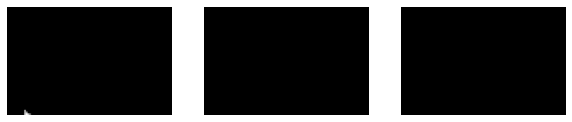

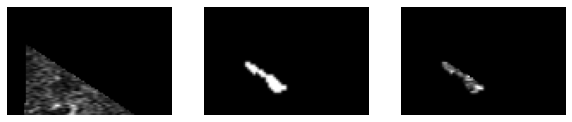

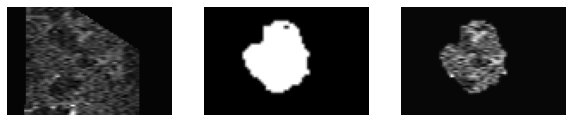

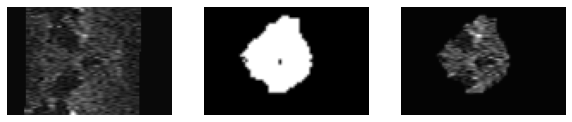

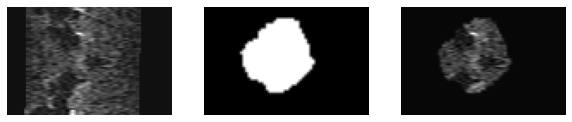

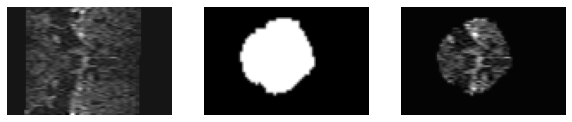

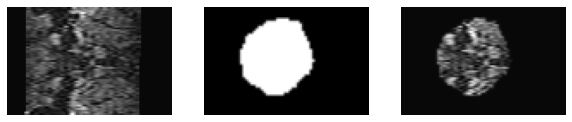

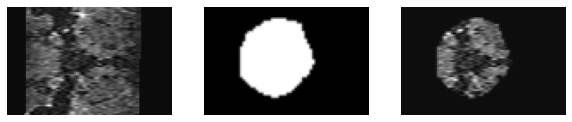

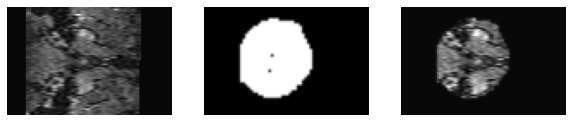

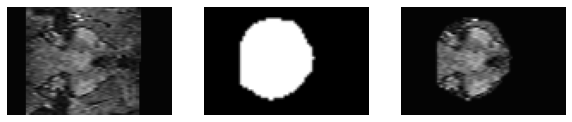

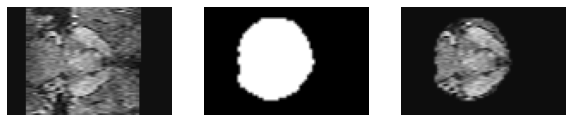

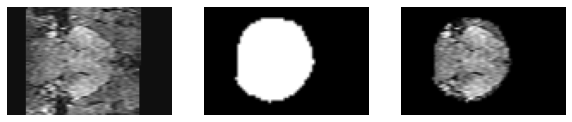

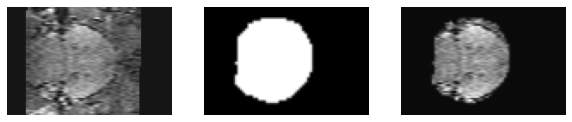

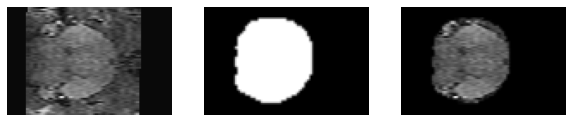

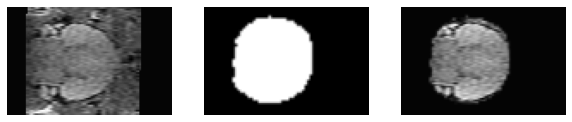

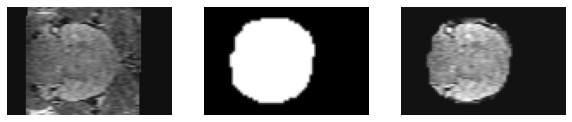

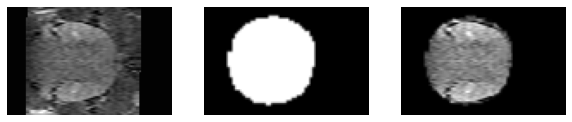

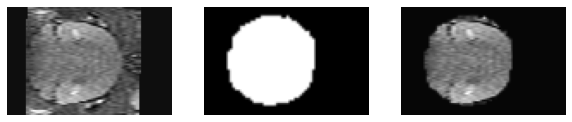

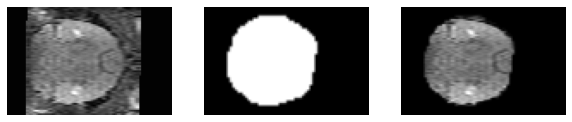

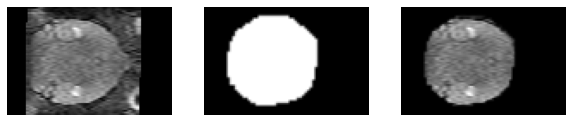

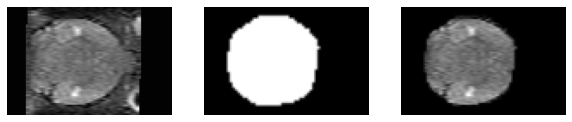

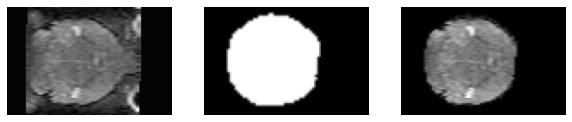

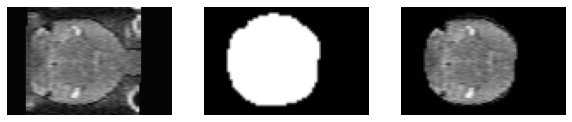

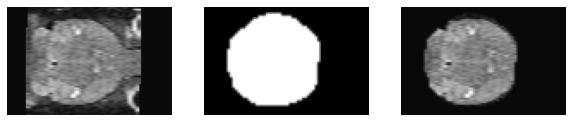

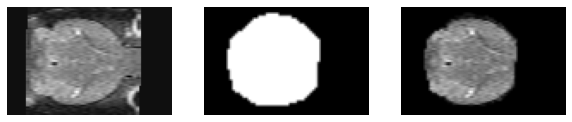

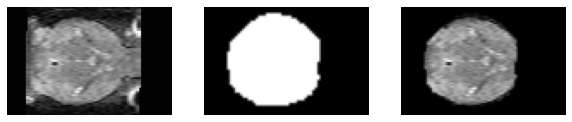

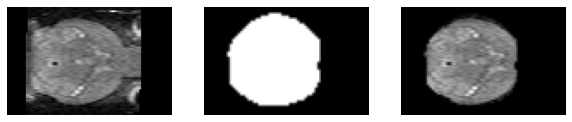

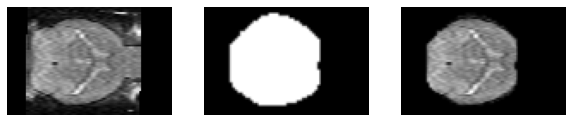

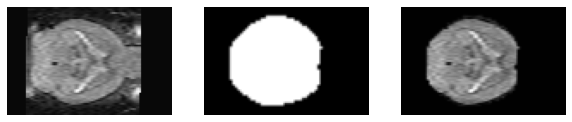

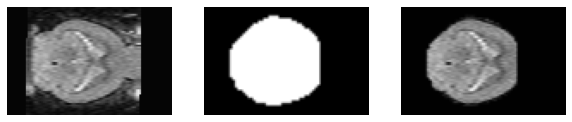

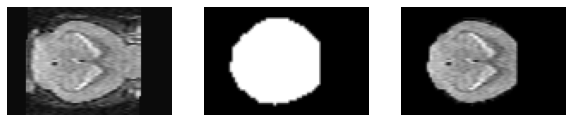

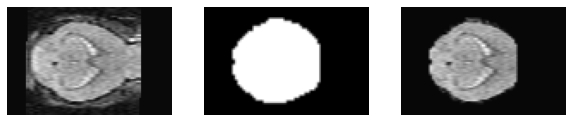

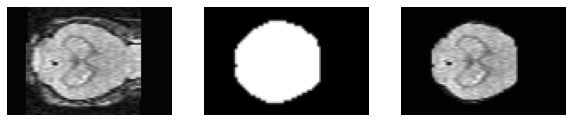

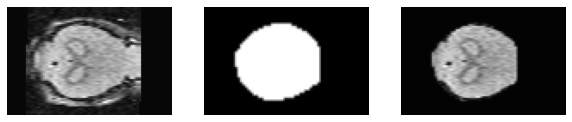

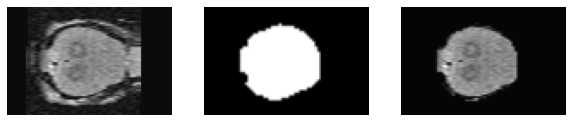

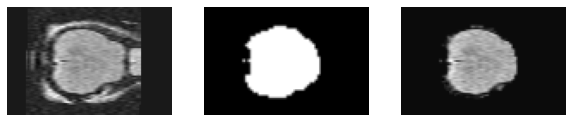

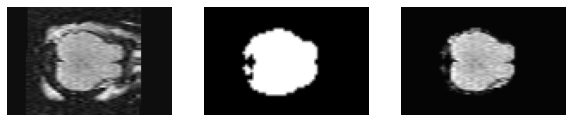

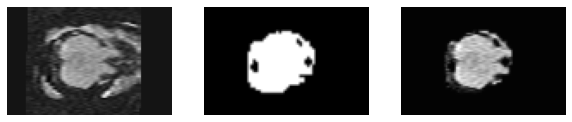

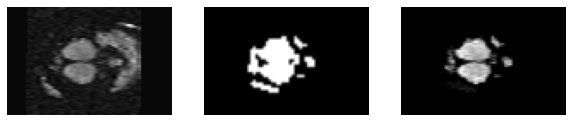

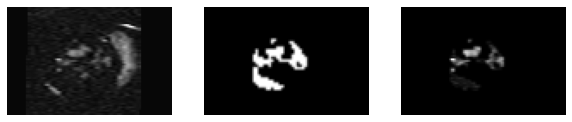

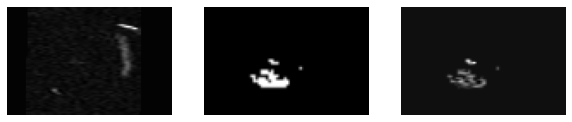

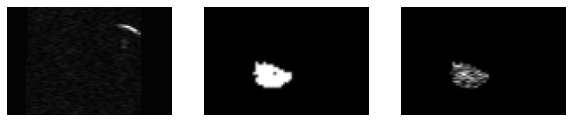

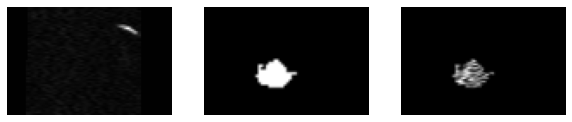

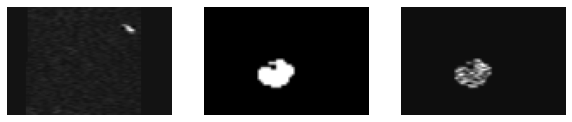

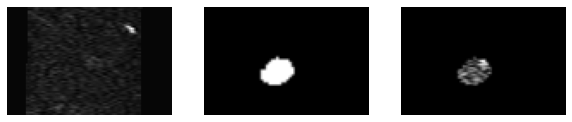

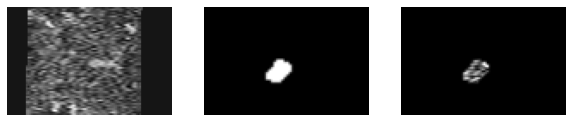

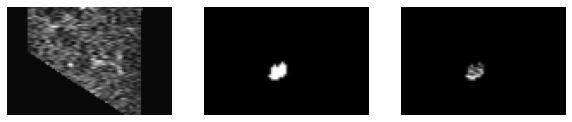

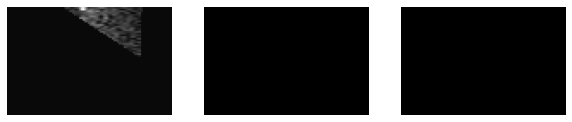

In [79]:
vis(inp=input_data, masked=masked_data, mask=resampled_mask_data)

In [67]:
model_results_table_path = Path('~/src/MLEBE_/mlebe/training/results.csv').expanduser()
model_results_table = pd.read_csv(model_results_table_path)
model_results_table_anat = model_results_table.loc[model_results_table[
                                                       'data_type'] == 'anat'].sort_values('Overall_Dice',
                                                                                           ascending=False)
model_results_table_func = model_results_table.loc[model_results_table[
                                                       'data_type'] == 'func'].sort_values('Overall_Dice',
                                                                                           ascending=False)

config_dict_path = Path('~/docsrc/mlebe_repsep/prepare/configs/noBiascorr_noCrop.json').expanduser()

In [68]:
model_results_table_anat.head()

,epoch,Seg_Loss,Overall_Acc,Mean_IOU,Overall_Dice,ROC_AUC,excluded,slice_view,pretrained_model,data_type,...,remove_black_slices,with_blacklist,blacklist_dir,irsabi_dice_mean,irsabi_dice_std,data_dimension_format,with_arranged_mask,experiment_duration,config_path,func_training_dir
49,165.0,-0.841366,0.998309,0.993608,0.994579,0.995275,NaN,coronal,False,anat,...,False,True,~/docsrc/mlebe/data/Blacklist,0.993193,0.044863,"x,y,z",True,439.0,/home/hendrik/src/MLEBE/mlebe/training/checkpo...,NaN
48,136.0,-0.841387,0.998246,0.993349,0.994355,0.995050,NaN,coronal,False,anat,...,False,True,~/docsrc/mlebe/data/Blacklist,0.992401,0.047282,"x,y,z",True,400.0,/home/hendrik/src/MLEBE/mlebe/training/checkpo...,NaN
35,117.0,0.005513,0.997273,0.989795,0.991335,0.995162,NaN,coronal,False,anat,...,False,True,~/docsrc/mlebe/data/Blacklist,0.990286,0.053772,"x,y,z",True,263.0,/home/hendrik/src/MLEBE/mlebe/training/checkpo...,NaN
43,96.0,0.019633,0.996981,0.988648,0.990337,0.996039,NaN,coronal,False,anat,...,False,True,~/docsrc/mlebe/data/Blacklist,0.989705,0.054996,"x,y,z",True,239.0,/home/hendrik/src/MLEBE/mlebe/training/checkpo...,NaN
54,176.0,-0.827021,0.996442,0.987406,0.989429,0.991707,NaN,coronal,False,anat,...,False,True,~/docsrc/mlebe/data/Blacklist,0.978082,0.101864,"x,y,z",False,791.0,/home/hendrik/src/MLEBE/mlebe/training/checkpo...,NaN


In [72]:
anat_model = model_results_table_anat.iloc[0]['config_path']
# update config with new models
write_to_jsonfile(config_dict_path, [('masking_config.masking_config_anat.model_config_path', anat_model)])

In [73]:
nii_path_masked, [resampled_mask_path], resampled_mask_path = predict_mask(in_file=in_file,input_type=input_type, masking_config_path= config_dict_path)

[20:42:17 CET] Writing model_config_path "/home/hendrik/src/MLEBE/mlebe/training/checkpoints/2020_7_17_20_4_14/trained_mlebe_config_anat.json" and model_path "/home/hendrik/src/MLEBE/mlebe/training/checkpoints/2020_7_17_20_4_14/126_net_unet_pct_multi_att_dsv.pth" to masking_config.
[20:42:18 CET] Resample image with "ResampleImage 3 /mnt/data/hendrik/mlebe_data/drlfom/dw_preprocessing/sub-6455/ses-ofM/anat/sub-6455_ses-ofM_acq-TurboRARE_T2w.nii.gz /home/hendrik/src/MLEBE/mlebe/masking/notebooks/resampled_input.nii.gz 0.2x0.2x0.2"
/home/hendrik/src/MLEBE/mlebe/training/models/networks_other.py:45: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight.data, a=0, mode='fan_in')
/home/hendrik/src/MLEBE/mlebe/training/models/networks_other.py:49: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, 1.0, 0.02)
/home/hendrik/src/MLEBE/mlebe/training/models/networks_other.py:5


Initialising model unet_pct_multi_att_dsv
Loading the model 126_net_unet_pct_multi_att_dsv.pth - epoch 126
Model [FeedForwardSegmentation] is created


############# Augmentation Parameters #############
{'bias_field_prob': 0.5,
 'bias_magnitude_range': 0.5,
 'division_factor': (16, 16, 1),
 'inten_val': (1.0, 1.0),
 'max_deform': [0, 0, 0],
 'max_output_channels': 2,
 'name': 'mlebe',
 'normalization': 'normalize_medic',
 'patch_size': (128, 128, 1),
 'random_affine_prob': 0.5,
 'random_elastic_prob': 0,
 'random_flip_prob': 0.5,
 'random_noise_prob': 0.5,
 'rotate_val': 20,
 'scale_proba': 0.5,
 'scale_range': [0.8, 1.1],
 'scale_size': [128, 128, 96, 1],
 'shift_val': [0, 0]}
###################################################




/home/hendrik/miniconda3/envs/mlebe/lib/python3.8/site-packages/torch/nn/functional.py:3325: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/hendrik/miniconda3/envs/mlebe/lib/python3.8/site-packages/torch/nn/functional.py:3451: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/home/hendrik/miniconda3/envs/mlebe/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
[20:42:26 CET] Resample image with "ResampleImage 3 /home/hendrik/src/MLEBE/mlebe/masking/notebooks/resized_mask.nii.gz  /home/hendrik

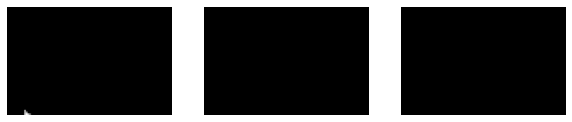

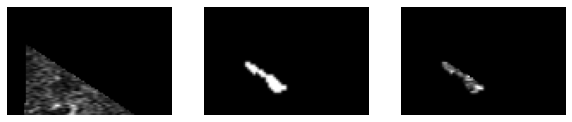

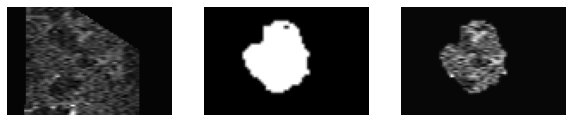

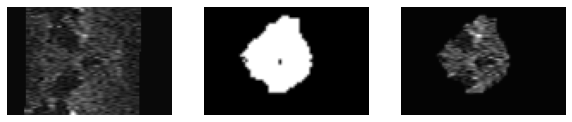

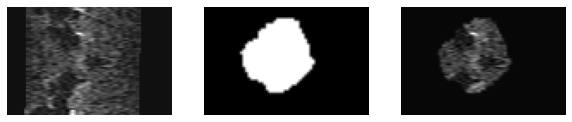

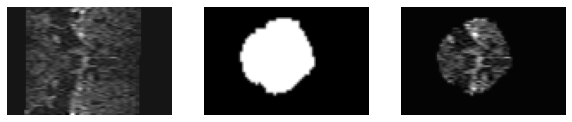

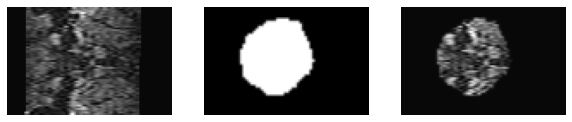

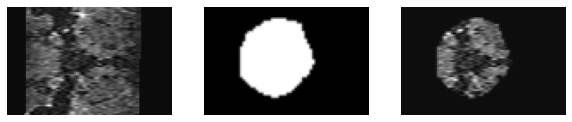

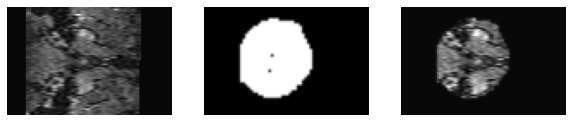

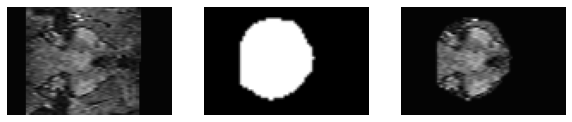

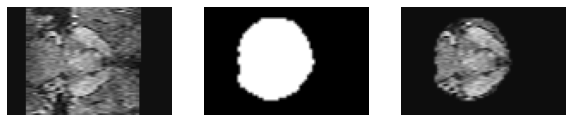

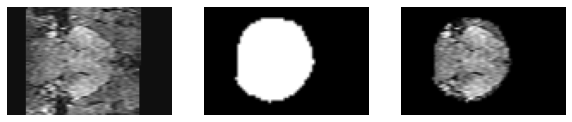

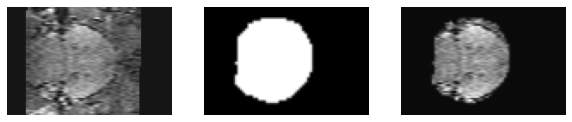

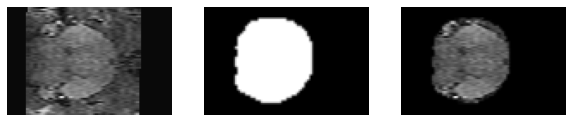

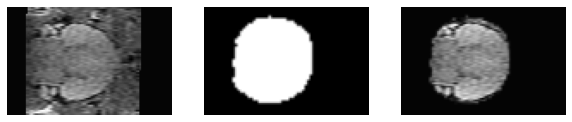

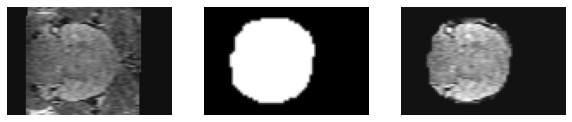

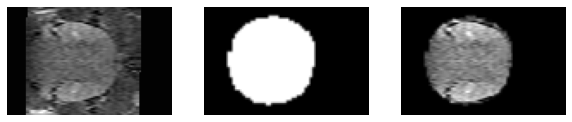

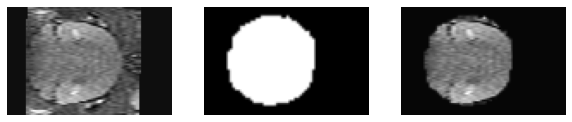

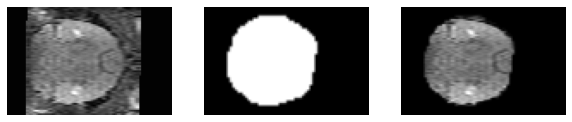

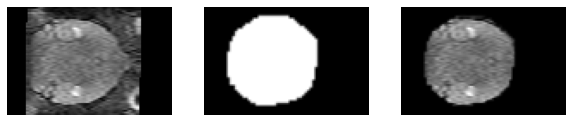

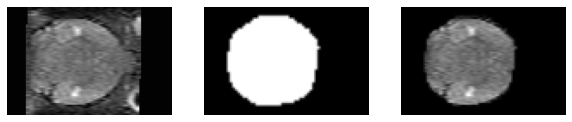

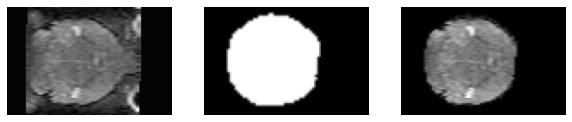

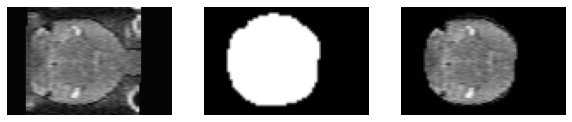

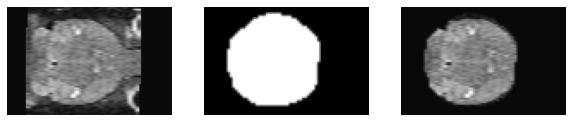

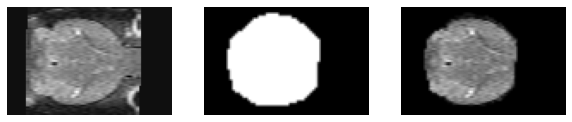

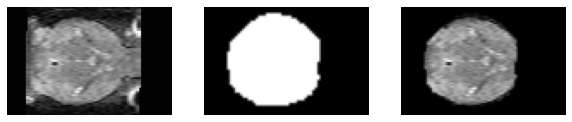

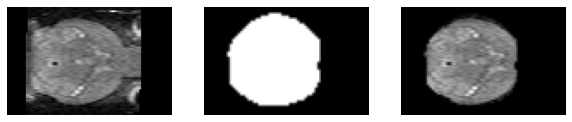

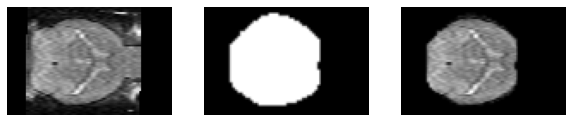

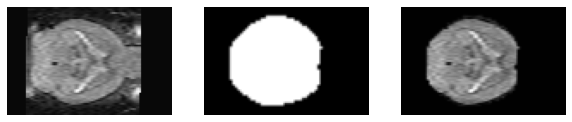

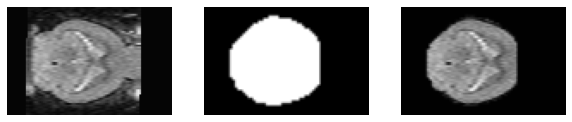

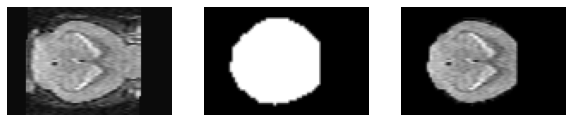

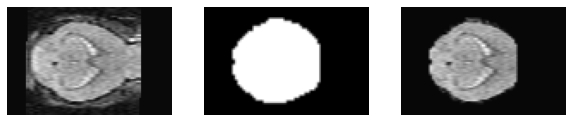

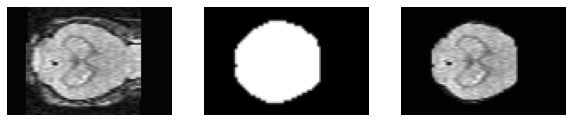

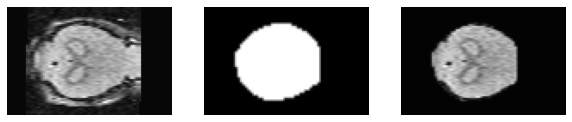

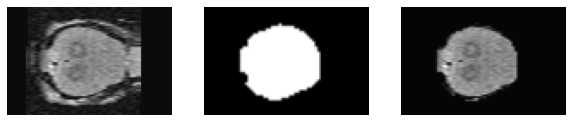

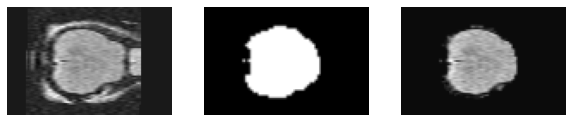

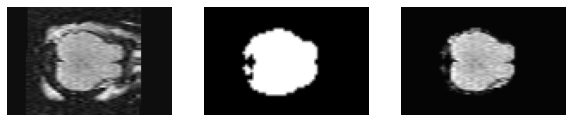

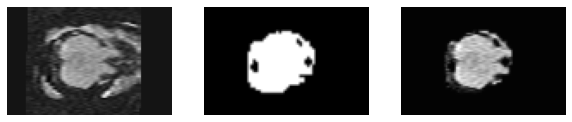

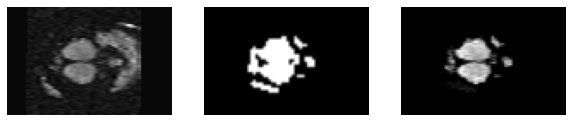

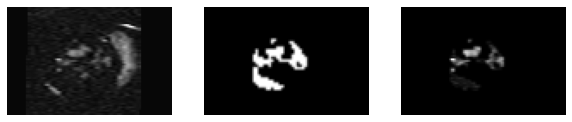

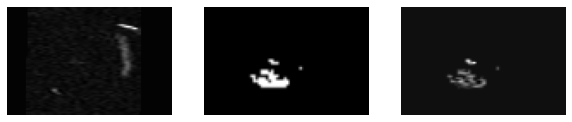

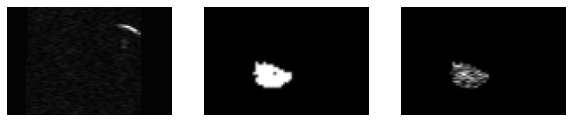

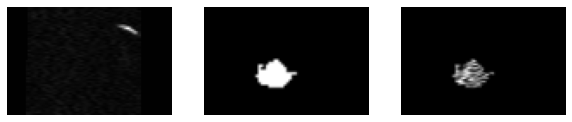

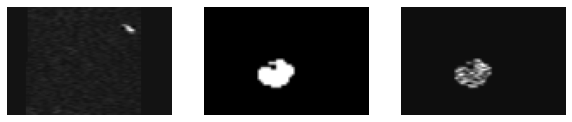

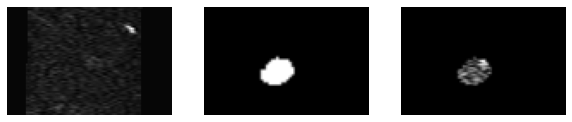

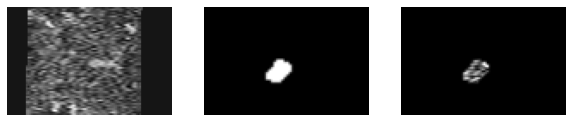

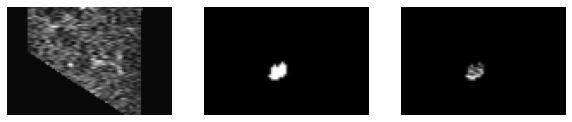

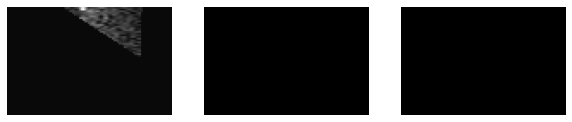

In [80]:
vis(inp=input_data, masked=masked_data, mask=resampled_mask_data)